In [1]:
import importlib
import sys
import os
import glob
import time
#import h5py
import traceback

import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil
import auxiliary as aux
import plotting as putil

In [2]:
putil.set_sns_style(style='dark', min_fontsize=8)
%matplotlib notebook
rootdir = util.get_rootdir()
rootdir

'/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'

In [10]:
rootdir = '/Volumes/Julie/2p-data'
# rootdir = '/mnt/minerva/2p-data'
# -------------------------------------------------
date = 20231002 #20230822 #20230725 #20230822 #20230822
flynum = 2 #5
# -------------------------------------------------
# get directories
session = str(date)
sessdir = os.path.join(rootdir, session)
print(sessdir)
# behavior data
behavior_dir = os.path.join(sessdir, 'behavior')
logdir = os.path.join(sessdir, 'behavior') #'logfiles')
videodir = os.path.join(sessdir, 'behavior') #'videos')
# 2p data
neural_dir = os.path.join(sessdir, 'raw')

# fly ID -------------------------------------------
flyid = 'fly{}'.format(flynum)
logfiles = aux.get_logs_for_fly_date(date, flynum, logdir)
#
figid = '{}-{}'.format(session, flyid)
print(figid, len(logfiles))

# DESTDIR -------------------------------------------
destdir = os.path.join(rootdir, session, 'processed')
if not os.path.exists(destdir):
    os.makedirs(destdir)
    
#
figdir = os.path.join(destdir, 'figures')
if not os.path.exists(figdir):
    os.makedirs(figdir)

/Volumes/Julie/2p-data/20231002
20231002-fly2 7


In [11]:
importlib.reload(aux)
importlib.reload(butil)
importlib.reload(util)

<module 'utils' from '/Users/julianarhee/Repositories/plume-tracking/utils.py'>

In [12]:
# debug
# #fn = logfiles[0]
# fn = '/Volumes/Julie/2p-data/20230822/behavior/20230822-124915_P1_activation_fly2_000.log'
# print(fn)
# exp_config = butil.load_experiment_config(fn)
# fps = exp_config['experiment']['acquisition_rate']
# df_ = butil.load_dataframe(fn, is_odor=False, remove_invalid=False) 
# df_  = aux.ft_skips_to_blocks(df_, acquisition_rate=fps)
# df_ = aux.process_df_blocks(df_)
# # df_ = aux.load_dataframe(fn)
# df_['blocknum'].unique()

In [13]:
xvar = 'ft_posx'
yvar = 'ft_posy'
default_cond = 'tap'
df0 = aux.logfiles_to_dataframe(logfiles, flyid)
merged = aux.merge_blocks(df0)

/Volumes/Julie/2p-data/20231002/behavior/20231002-114647_P1_activation_fly2-test_000.log
/Volumes/Julie/2p-data/20231002/behavior/20231002-121130_P1_activation_fly2-ledoff_001.log
/Volumes/Julie/2p-data/20231002/behavior/20231002-122509_P1_activation_fly2-ledon_002.log
*Warning: N zero points (0) don't match skips (17) -- using N zero points.
/Volumes/Julie/2p-data/20231002/behavior/20231002-123356_P1_activation_fly2-ledon_003.log
/Volumes/Julie/2p-data/20231002/behavior/20231002-125953_P1_activation_fly2-ledoff_004.log
/Volumes/Julie/2p-data/20231002/behavior/20231002-130543_P1_activation_fly2-ledoff_005.log
/Volumes/Julie/2p-data/20231002/behavior/20231002-132424_P1_activation_fly2-notap_000.log


In [14]:
logfiles

['/Volumes/Julie/2p-data/20231002/behavior/20231002-114647_P1_activation_fly2-test_000.log',
 '/Volumes/Julie/2p-data/20231002/behavior/20231002-121130_P1_activation_fly2-ledoff_001.log',
 '/Volumes/Julie/2p-data/20231002/behavior/20231002-122509_P1_activation_fly2-ledon_002.log',
 '/Volumes/Julie/2p-data/20231002/behavior/20231002-123356_P1_activation_fly2-ledon_003.log',
 '/Volumes/Julie/2p-data/20231002/behavior/20231002-125953_P1_activation_fly2-ledoff_004.log',
 '/Volumes/Julie/2p-data/20231002/behavior/20231002-130543_P1_activation_fly2-ledoff_005.log',
 '/Volumes/Julie/2p-data/20231002/behavior/20231002-132424_P1_activation_fly2-notap_000.log']

In [15]:
merged['filename'].unique()

array(['20231002-114647_P1_activation_fly2-test_000',
       '20231002-121130_P1_activation_fly2-ledoff_001',
       '20231002-122509_P1_activation_fly2-ledon_002',
       '20231002-123356_P1_activation_fly2-ledon_003',
       '20231002-125953_P1_activation_fly2-ledoff_004',
       '20231002-130543_P1_activation_fly2-ledoff_005',
       '20231002-132424_P1_activation_fly2-notap_000'], dtype=object)

In [16]:
# fn = '/mnt/minerva/2p-data/20230822/behavior/20230822-185038_P1_activation_fly5_003.log'
# exp_config = butil.load_experiment_config(fn)
# fps = exp_config['experiment']['acquisition_rate']
# #df_, cfg_= aux.load_dataframe(fn) # is_odor=False, remove_invalid=False)
# df_, cfg_= aux.load_dataframe(fn) # is_odor=False, remove_invalid=False)
# #df_  = aux.ft_skips_to_blocks(df_, acquisition_rate=fps)

In [25]:
# bad_skips = butil.check_ft_skips(df_, acquisition_rate=fps, return_skips=True)
# bad_skips

# df_, cfg_= aux.load_dataframe(fn) 

In [26]:
# bad_skips = butil.check_ft_skips(df_, acquisition_rate=fps, return_skips=True)
# bad_skips

In [17]:
# df_.iloc[280:290][['ft_posx', 'ft_posy', 'rel_time']].diff()

In [27]:
# # del df
# df_list=[]
# for fn, df in df0.groupby('filename'):
#     print(fn, df.shape, df['blocknum'].unique())
#     if df['blocknum'].nunique()>1:
#         last_x, last_y, last_t = df[df['blocknum']==0][['ft_posx', 'ft_posy', 'rel_time']].iloc[-1]
#         for bnum, block_ in df[df['blocknum']>0].groupby('blocknum'):
#             print(fn, bnum)
#             #print(bnum, last_x, last_y, last_t)
#             curr_xvs = df[df['blocknum']==bnum]['ft_posx'].values
#             curr_yvs = df[df['blocknum']==bnum]['ft_posy'].values
#             #curr_ts = df[df['blocknum']==bnum]['rel_time'].values
#             # add offsets
#             df.loc[df['blocknum']==bnum, 'ft_posx'] = curr_xvs + last_x
#             df.loc[df['blocknum']==bnum, 'ft_posy'] = curr_yvs + last_y
#             #df.loc[df['blocknum']==bnum, 'rel_time'] = curr_ts + last_t
#             # update last
#             last_x, last_y, last_t = df[df['blocknum']==bnum][['ft_posx', 'ft_posy', 'rel_time']].iloc[-1]
#         # reprocess with updated position info
#         df_p = aux.process_df(df) # fps=fps, filter_duration=False)
#         df_list.append(df_p)
#     else:
#         df_list.append(df)
# merged = pd.concat(df_list, axis=0)


In [28]:
# fn = '/mnt/minerva/2p-data/20230822/behavior/20230822-185038_P1_activation_fly5_003.log'

# merged[merged['fpath']==fn].iloc[280:290][['ft_posx', 'ft_posy', 'rel_time']].diff()

In [16]:
merged['blocknum'].unique()

array([0])

In [18]:
merged['filename'].unique()

array(['20231002-114647_P1_activation_fly2-test_000',
       '20231002-121130_P1_activation_fly2-ledoff_001',
       '20231002-122509_P1_activation_fly2-ledon_002',
       '20231002-123356_P1_activation_fly2-ledon_003',
       '20231002-125953_P1_activation_fly2-ledoff_004',
       '20231002-130543_P1_activation_fly2-ledoff_005',
       '20231002-132424_P1_activation_fly2-notap_000'], dtype=object)

<IPython.core.display.Javascript object>


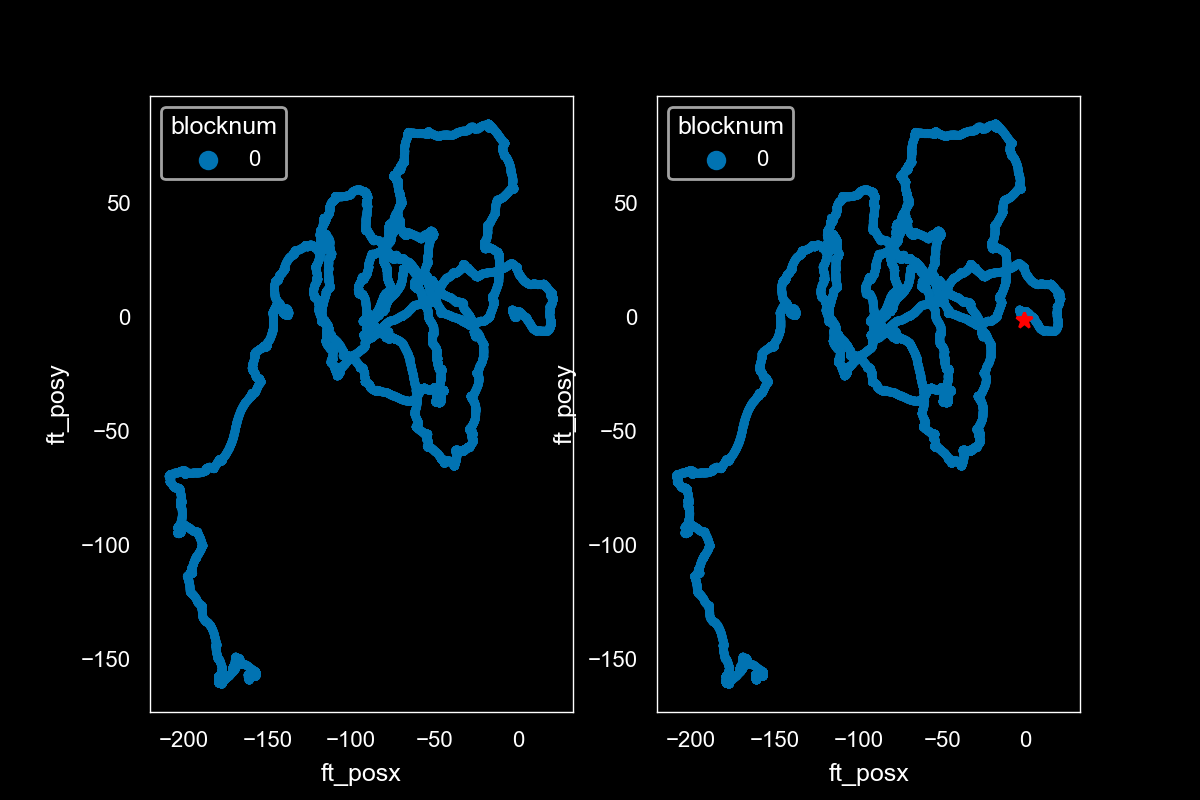

In [23]:
fig, axn = pl.subplots(1, 2)
# fn = '20231002-123356_P1_activation_fly2-ledon_003'
fn = '20231002-121130_P1_activation_fly2-ledoff_001'
ax=axn[0]
sns.scatterplot(data=df0[df0['filename']==fn], x='ft_posx', y='ft_posy', hue='blocknum', edgecolor='none', palette='colorblind', s=10, ax=ax)
ax=axn[1]
sns.scatterplot(data=merged[merged['filename']==fn], x='ft_posx', y='ft_posy', hue='blocknum', edgecolor='none', palette='colorblind', s=10, ax=ax)
ax.plot(merged[merged['filename']==fn].iloc[0]['ft_posx'], 
        merged[merged['filename']==fn].iloc[0]['ft_posx'], 'r*')

In [25]:
filenames = sorted(df0['filename'].dropna().unique(), key=util.natsort)
filenames

['20231002-114647_P1_activation_fly2-test_000',
 '20231002-121130_P1_activation_fly2-ledoff_001',
 '20231002-122509_P1_activation_fly2-ledon_002',
 '20231002-123356_P1_activation_fly2-ledon_003',
 '20231002-125953_P1_activation_fly2-ledoff_004',
 '20231002-130543_P1_activation_fly2-ledoff_005',
 '20231002-132424_P1_activation_fly2-notap_000']

In [26]:
# save
merged_data_fpath = os.path.join(destdir, '{}.pkl'.format(figid))
print(merged_data_fpath)
merged.to_pickle(merged_data_fpath)  # where to save it, usually as a .pkl
merged.to_csv(merged_data_fpath.replace('pkl', 'csv'))

/Volumes/Julie/2p-data/20231002/processed/20231002-fly2.pkl


<IPython.core.display.Javascript object>


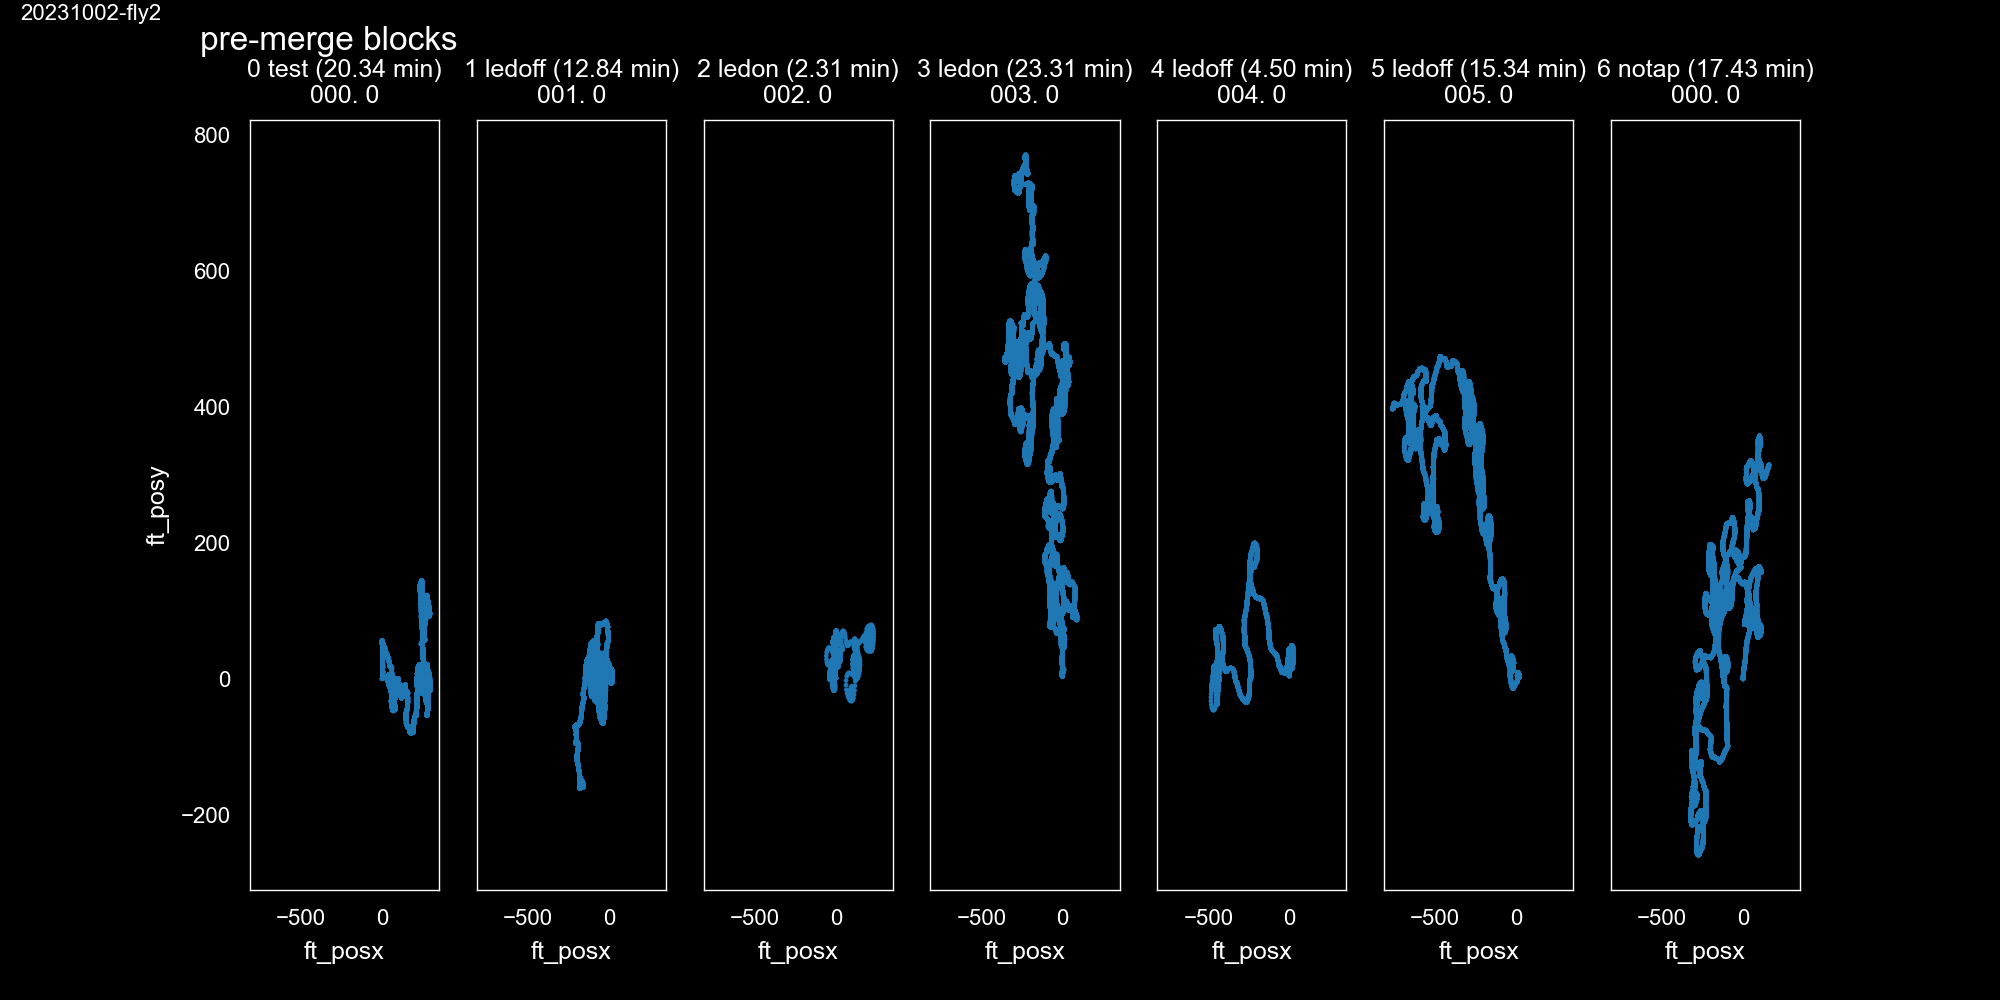

20231002-132424_P1_activation_fly2-notap_000
tracking_premerge-bouts_20231002-fly2


In [27]:
#curr_trials = df0[['filename', 'blocknum']].drop_duplicates().dropna().shape[0]
n_trials = len(filenames)
max_nblocks = int(df0['blocknum'].max()+1)
fig, axn = pl.subplots(1, n_trials, figsize=(10, 5), sharex=True, sharey=True)
    
for fi, (fn, df_) in enumerate(df0.sort_values(by='filename').groupby('filename')):
    colors = sns.color_palette('cubehelix', n_colors=df_['blocknum'].nunique())
    for ci, (bk, df2) in enumerate(df_.groupby('blocknum')):
        ax=axn[fi]
        dur_min = df_['rel_time'].max() / 60.
        sns.scatterplot(data=df2, x=xvar, y=yvar, ax=ax,
                       edgecolor='none', s=3 , legend=0, hue='blocknum', color=colors[ci])
        curr_cond = df_['condition'].unique()[0]
    ax.set_title('{} {} ({:.2f} min)\n{}. {}'.format(fi, curr_cond, dur_min, \
                                                  fn.split('_')[-1], bk))
    #ax.set_aspect('equal')
#util.label_figure(fig, '{}'.format(os.path.split(fn)[-1]))
figname = '{}'.format(fn)
print(fn)
fig.text(0.1, 0.95, 'pre-merge blocks', fontsize=12)

util.label_figure(fig, figid)
figname = 'tracking_premerge-bouts_{}'.format(figid)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(figname)

## double-check correct position updating

<IPython.core.display.Javascript object>


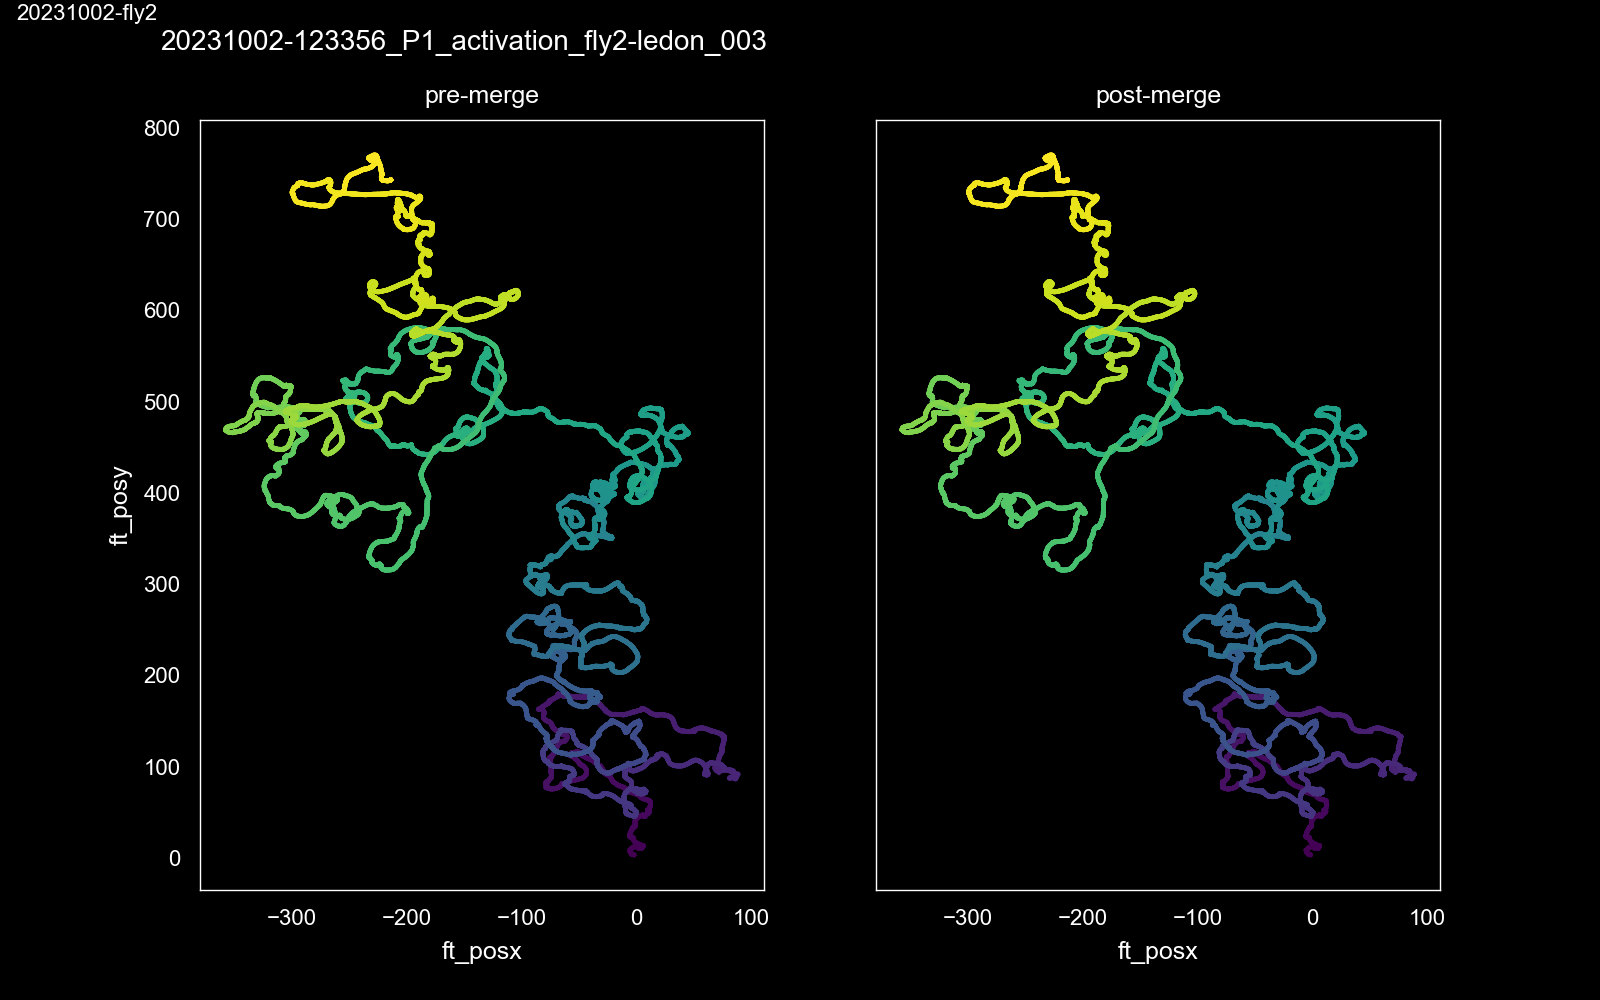

tracking_check-merge_traj-by-time


<IPython.core.display.Javascript object>


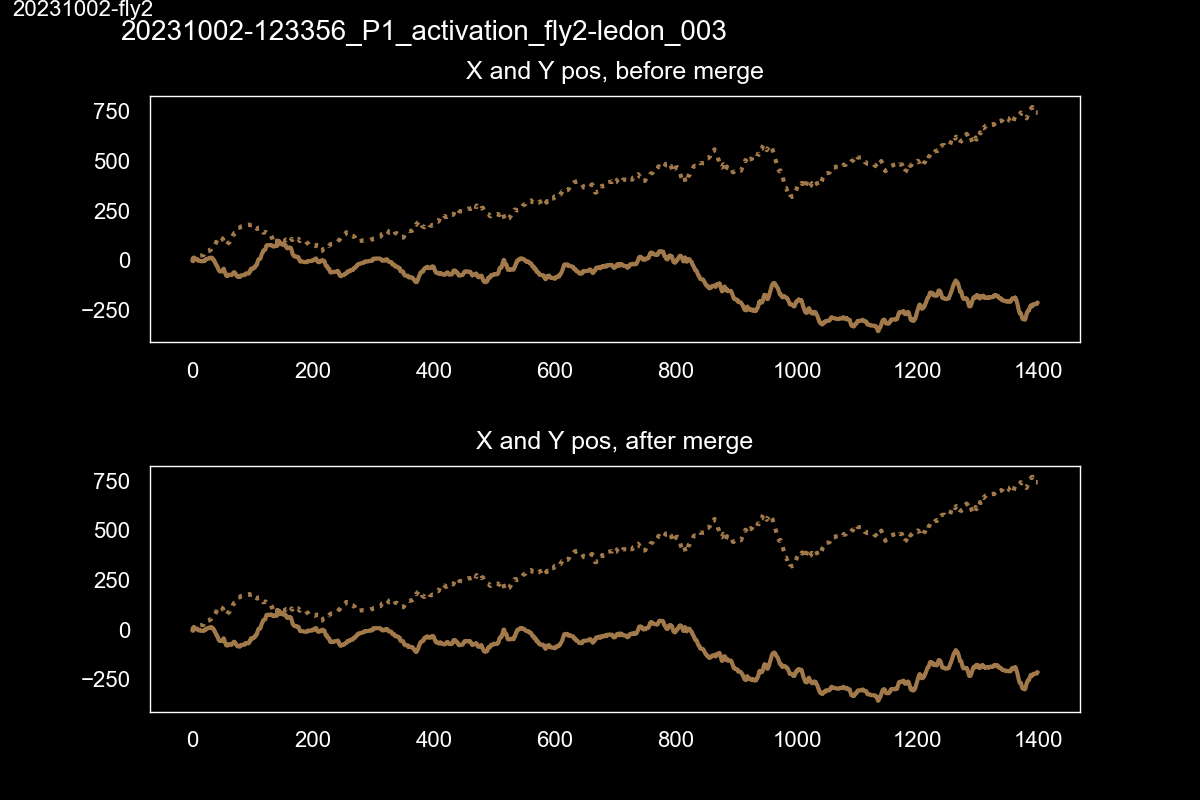

tracking_check-merge_xy-blocks_20231002-fly2


In [31]:
# ------------------------------------------ 
# check trajector pre/post
# ------------------------------------------
fn = df0['filename'].unique()[3]
df0_ = df0[df0['filename']==fn].copy()
df1_ = merged[merged['filename']==fn].copy()
fig, axn = pl.subplots(1,2, figsize=(8,5), sharex=True, sharey=True)
fig.text(0.1, 0.95, fn)
ax=axn[0]; ax.set_title('pre-merge')
sns.scatterplot(data=df0_, x=xvar, y=yvar, ax=ax, 
                hue='rel_time',palette='viridis',
                edgecolor='none', s=3 , legend=0) 
ax=axn[1]; ax.set_title('post-merge')
sns.scatterplot(data=df1_, x=xvar, y=yvar, ax=ax, hue='rel_time',palette='viridis',
                       edgecolor='none', s=3 , legend=0)

util.label_figure(fig, figid)
figname = 'tracking_check-merge_traj-by-time'
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(figname)

# ------------------------------------------ 
# split x, y by block
# ------------------------------------------
fig, axn = pl.subplots(2, 1)
fig.text(0.1, 0.95, fn)
ax=axn[0]
for c, (bnum, b_) in zip(colors, df0_.groupby('blocknum')):
    ax.plot(b_['rel_time'], b_['ft_posx'], color=c)
    ax.plot(b_['rel_time'], b_['ft_posy'], color=c, linestyle=':')
ax.set_title('X and Y pos, before merge')
ax=axn[1]
for c, (bnum, b_) in zip(colors, df1_.groupby('blocknum')):
    ax.plot(b_['rel_time'], b_['ft_posx'], color=c)
    ax.plot(b_['rel_time'], b_['ft_posy'], color=c, linestyle=':')
ax.set_title('X and Y pos, after merge')
pl.subplots_adjust(hspace=0.5)

util.label_figure(fig, figid)
figname = 'tracking_check-merge_xy-blocks_{}'.format(figid)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(figname)

In [32]:
merged['filename'].unique()

array(['20231002-114647_P1_activation_fly2-test_000',
       '20231002-121130_P1_activation_fly2-ledoff_001',
       '20231002-122509_P1_activation_fly2-ledon_002',
       '20231002-123356_P1_activation_fly2-ledon_003',
       '20231002-125953_P1_activation_fly2-ledoff_004',
       '20231002-130543_P1_activation_fly2-ledoff_005',
       '20231002-132424_P1_activation_fly2-notap_000'], dtype=object)

<IPython.core.display.Javascript object>


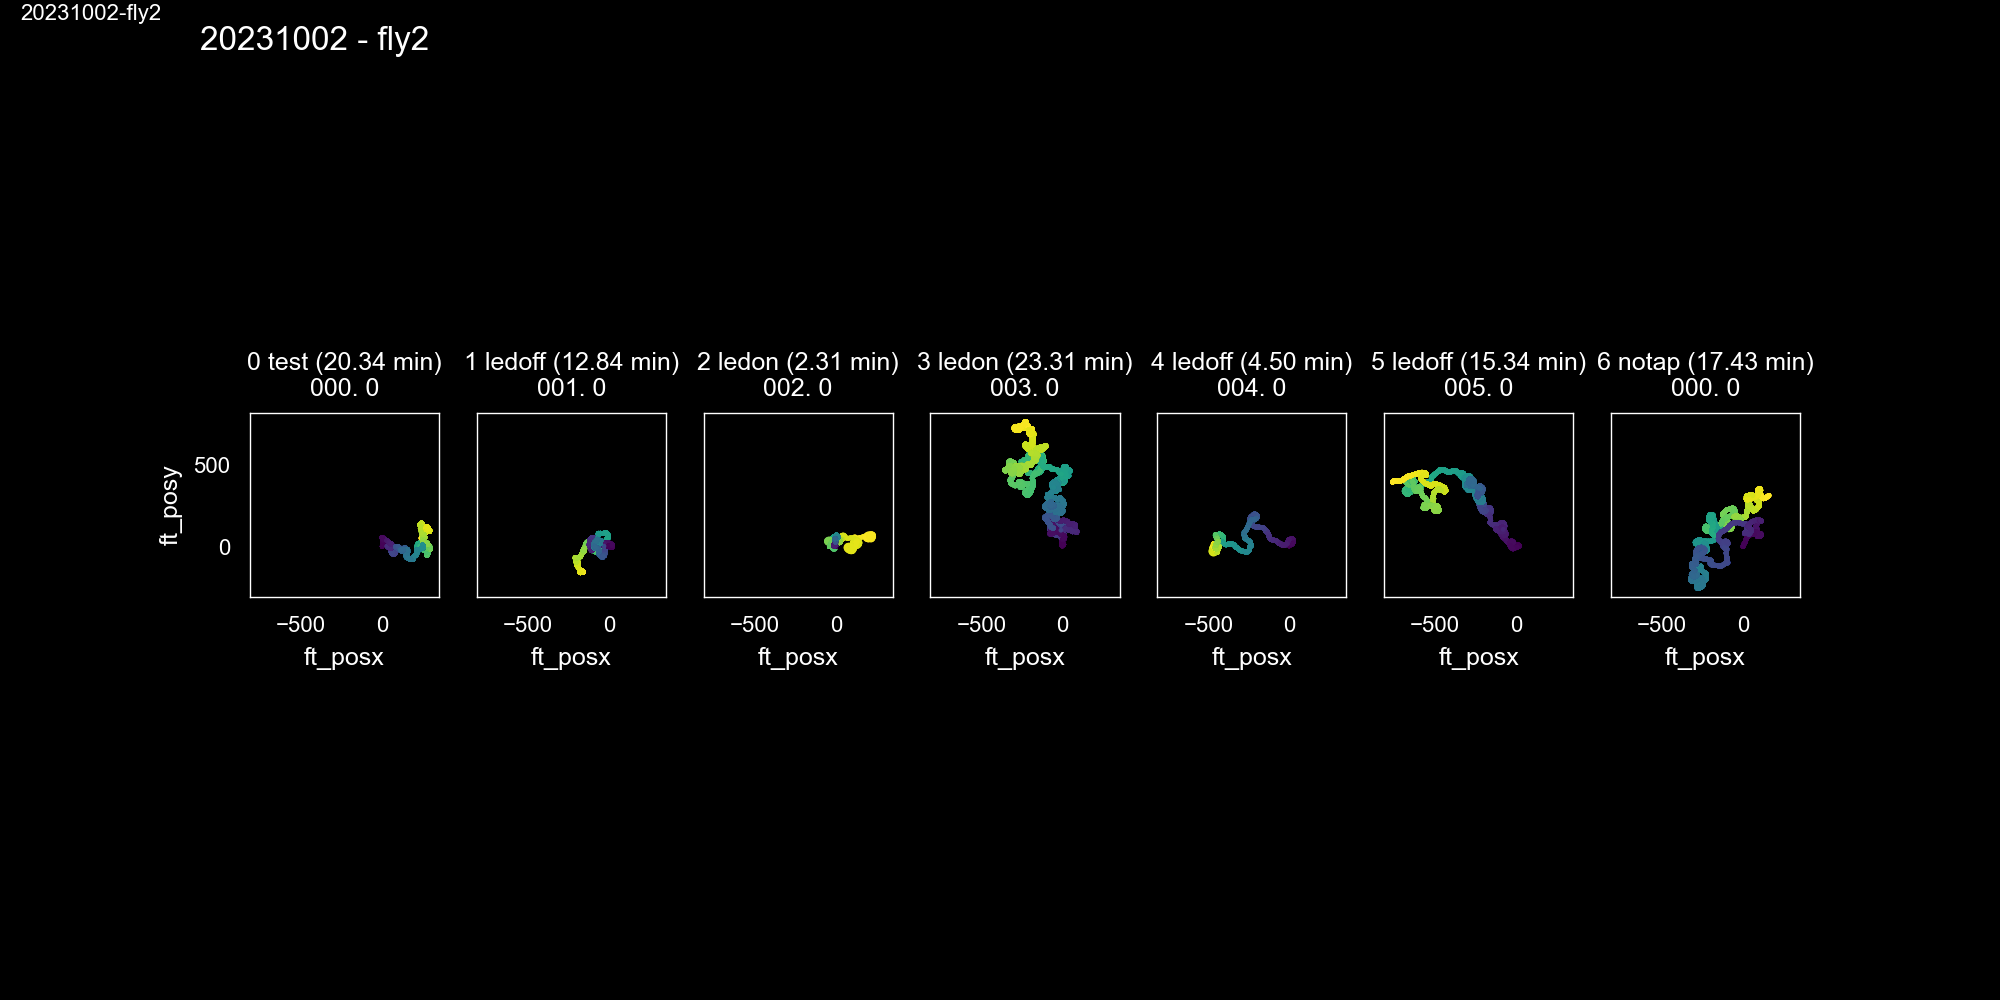

20231002-132424_P1_activation_fly2-notap_000
tracking_merged-bouts_by-time_20231002-fly2


In [34]:
#curr_trials = df0[['filename', 'blocknum']].drop_duplicates().dropna().shape[0]
n_trials = merged['filename'].dropna().nunique()
max_nblocks = int(df0['blocknum'].max()+1)
fig, axn = pl.subplots(1, n_trials, figsize=(10, 5), sharex=True, sharey=True)
    
for fi, (fn, df_) in enumerate(merged.sort_values(by='filename').groupby('filename')):
    colors = sns.color_palette('cubehelix', n_colors=df_['blocknum'].nunique())
    ax=axn[fi]
    dur_min = df_['rel_time'].max() / 60.
    sns.scatterplot(data=df_, x=xvar, y=yvar, ax=ax, palette='viridis',
                   edgecolor='none', s=3 , legend=0, hue='rel_time') #color=colors[ci])
                    #hue_norm=mpl.colors.Normalize(vmin=0, vmax=1800))
    curr_cond = df_['condition'].unique()[0]
    ax.set_title('{} {} ({:.2f} min)\n{}. {}'.format(fi, curr_cond, dur_min, \
                                                  fn.split('_')[-1], bk))
    ax.set_aspect('equal')
    #ax.set_aspect('equal')
#util.label_figure(fig, '{}'.format(os.path.split(fn)[-1]))
figname = '{}'.format(fn)
print(fn)
    
fig.text(0.1, 0.95, '{} - {}'.format(date, flyid), fontsize=12)

util.label_figure(fig, figid)
figname = 'tracking_merged-bouts_by-time_{}'.format(figid)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(figname)

In [340]:
merged['filename'].unique()

array(['20230822-180203_P1_activation_fly5_000',
       '20230822-180322_P1_activation_fly5_000',
       '20230822-182855_P1_activation_fly5_002',
       '20230822-185038_P1_activation_fly5_003'], dtype=object)

In [341]:
df0['filename'].dropna().unique()

array(['20230822-180203_P1_activation_fly5_000',
       '20230822-180322_P1_activation_fly5_000',
       '20230822-182855_P1_activation_fly5_002',
       '20230822-185038_P1_activation_fly5_003'], dtype=object)

## Look at 1 trial

In [36]:
for fi, fn in enumerate(filenames):
    print(fi, fn)

0 20231002-114647_P1_activation_fly2-test_000
1 20231002-121130_P1_activation_fly2-ledoff_001
2 20231002-122509_P1_activation_fly2-ledon_002
3 20231002-123356_P1_activation_fly2-ledon_003
4 20231002-125953_P1_activation_fly2-ledoff_004
5 20231002-130543_P1_activation_fly2-ledoff_005
6 20231002-132424_P1_activation_fly2-notap_000


20231002-130543_P1_activation_fly2-ledoff_005


<IPython.core.display.Javascript object>


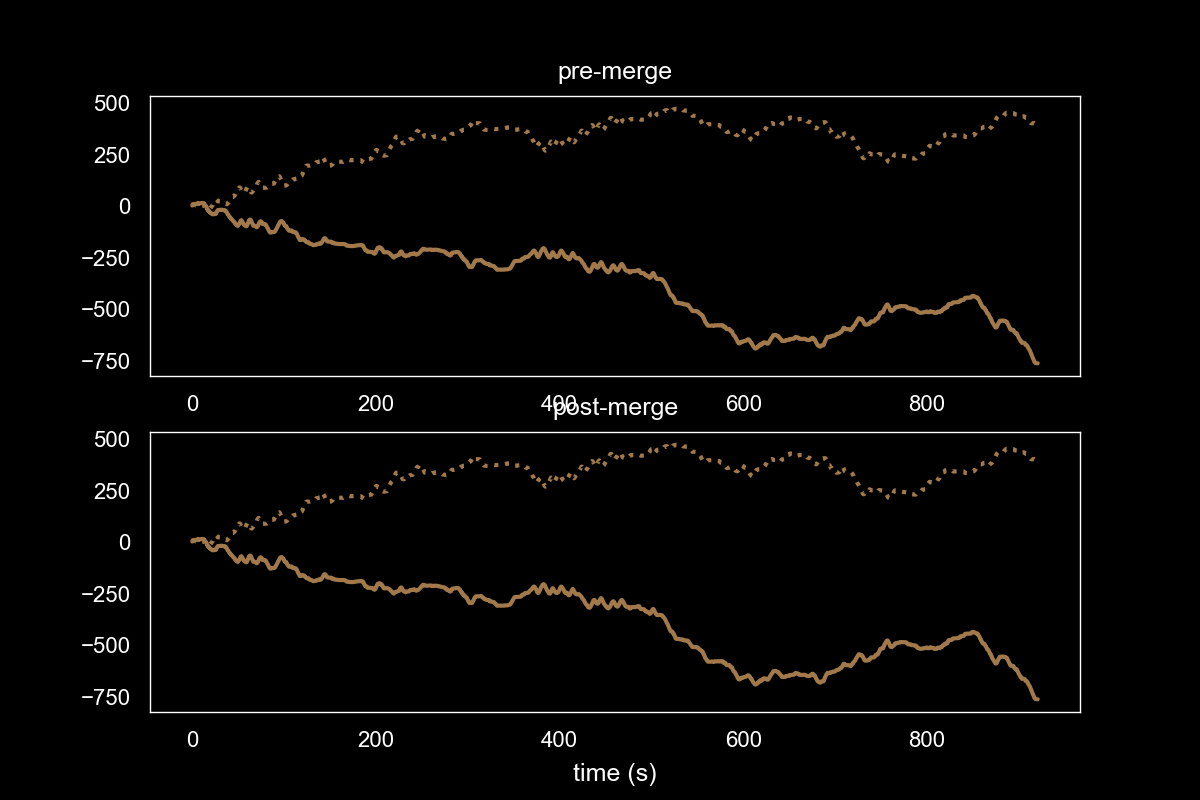

Text(0.5, 0, 'time (s)')

In [37]:
fn = filenames[5]
print(fn)
df0_ = df0[df0['filename']==fn].copy()
df1_ = merged[merged['filename']==fn].copy()
fig, axn = pl.subplots(2, 1)
ax=axn[0]; ax.set_title('pre-merge');
for c, (bnum, b_) in zip(colors, df0_.groupby('blocknum')):
    ax.plot(b_['rel_time'], b_['ft_posx'], color=c)
    ax.plot(b_['rel_time'], b_['ft_posy'], color=c, linestyle=':')
    
ax=axn[1]; ax.set_title('post-merge')
for c, (bnum, b_) in zip(colors, df1_.groupby('blocknum')):
    ax.plot(b_['rel_time'], b_['ft_posx'], color=c)
    ax.plot(b_['rel_time'], b_['ft_posy'], color=c, linestyle=':')
    
ax.set_xlabel('time (s)')

## Compare 2 conditions

<IPython.core.display.Javascript object>


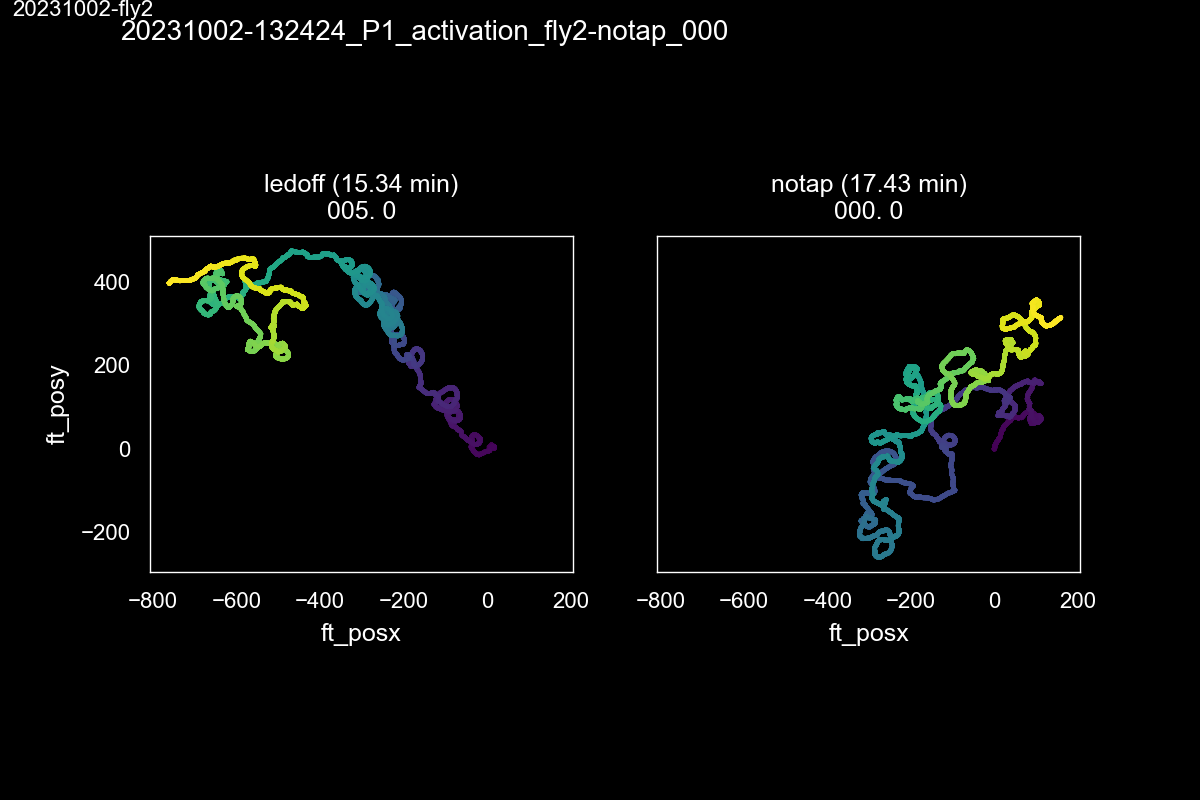

tracking_by-time_tap_v_notap_20231002-130543_P1_activation_fly2-ledoff_005


In [39]:
fig, axn = pl.subplots(1, 2, sharex=True, sharey=True)
f1 = filenames[5];
f2 = filenames[6]
for ai, fn in enumerate([f1, f2]):
    ax=axn[ai]
    df1_ = merged[merged['filename']==fn].copy()
    dur_min = df1_['rel_time'].max() / 60.
    sns.scatterplot(data=df1_, x=xvar, y=yvar, ax=ax, palette='viridis',
                   edgecolor='none', s=3 , legend=0, hue='rel_time') #color=colors[ci])
                    #hue_norm=mpl.colors.Normalize(vmin=0, vmax=1800))
    curr_cond = df1_['condition'].unique()[0]
    ax.set_title('{} ({:.2f} min)\n{}. {}'.format(curr_cond, dur_min, \
                                                  fn.split('_')[-1], bk))
    ax.set_aspect('equal')
fig.text(0.1, 0.95, fn)

util.label_figure(fig, figid)
figname = 'tracking_by-time_tap_v_notap_{}'.format(f1)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(figname)

<IPython.core.display.Javascript object>


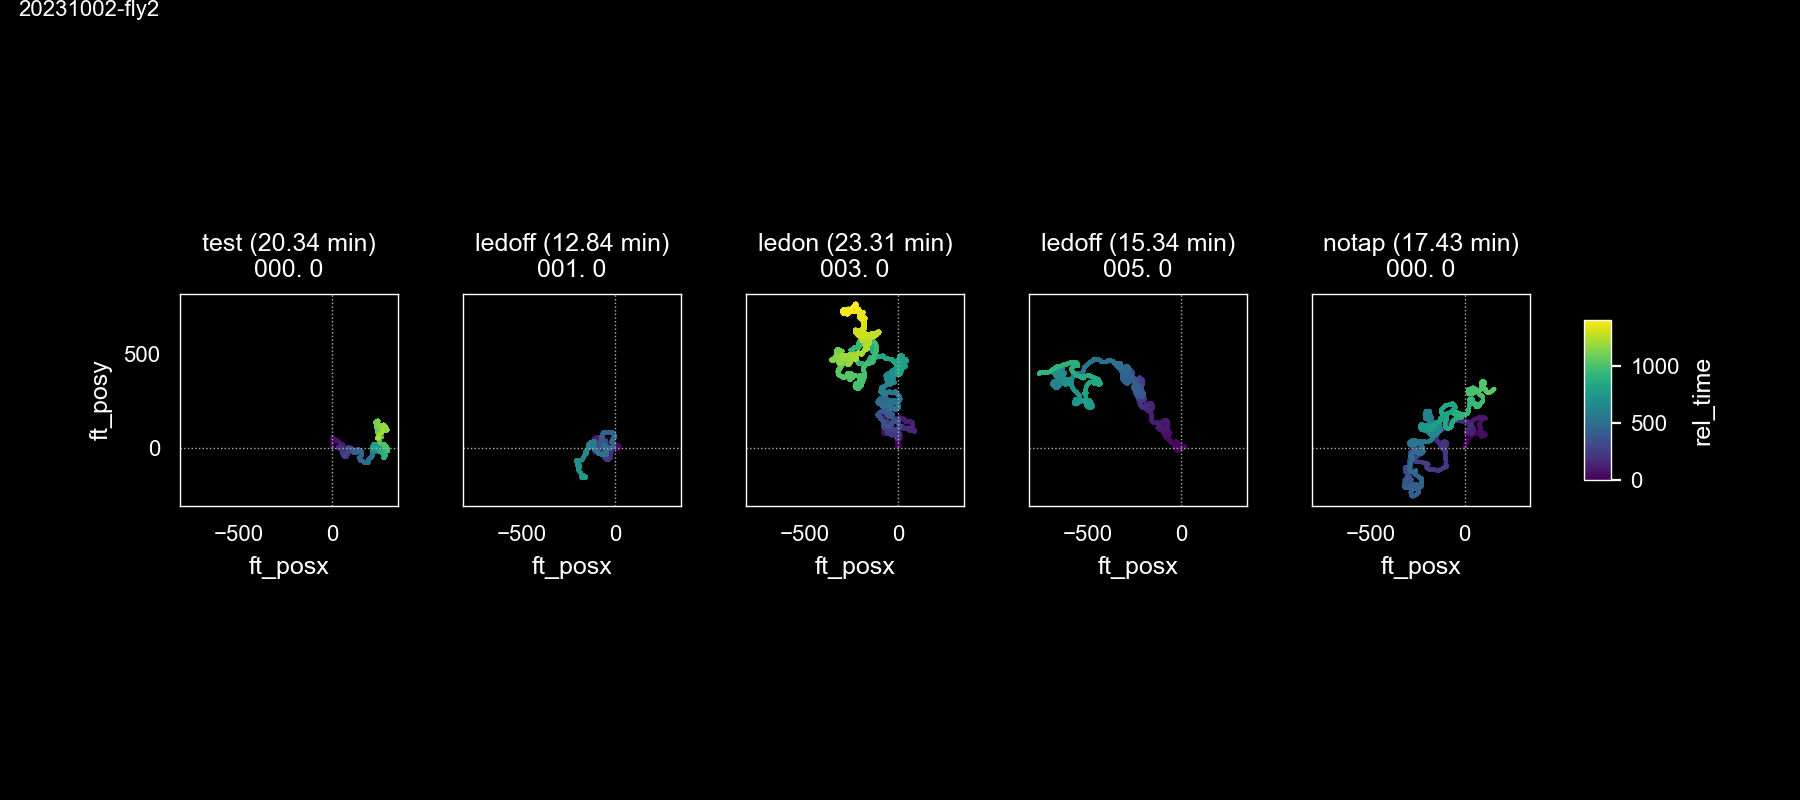

/Volumes/Julie/2p-data/20231002/processed/figures tracking_by-time_compare-conds_20231002-fly2


In [57]:
vmin, vmax = merged['rel_time'].min(), merged['rel_time'].max()
hue_norm = mpl.colors.Normalize(vmin, vmax)
hue_cmap = 'viridis'
hue_var = 'rel_time'

fig, axn = pl.subplots(1, 5, figsize=(9,4), sharex=True, sharey=True)
f = filenames[0]
f0 = filenames[1]
f1 = filenames[3];
f2 = filenames[5];
f3 = filenames[6]
for ai, fn in enumerate([f, f0, f1, f2, f3]):
    ax=axn[ai]
    df1_ = merged[merged['filename']==fn].copy()
    dur_min = df1_['rel_time'].max() / 60.
    sns.scatterplot(data=df1_, x=xvar, y=yvar, ax=ax, palette=hue_cmap,
                   edgecolor='none', s=2 , legend=0, hue=hue_var, hue_norm=hue_norm) #color=colors[ci])
                    #hue_norm=mpl.colors.Normalize(vmin=0, vmax=1800))
    curr_cond = df1_['condition'].unique()[0]
    ax.set_title('{} ({:.2f} min)\n{}. {}'.format(curr_cond, dur_min, \
                                                  fn.split('_')[-1], bk))
    ax.axvline(x=0, linestyle=':', lw=0.5, color=[0.7]*3)
    ax.axhline(y=0, linestyle=':', lw=0.5, color=[0.7]*3)
    ax.set_aspect('equal')
# Colorbar
cax = fig.add_axes([0.88 ,0.4, 0.015, 0.2])
points = pl.scatter([], [], c=[], vmin=vmax, vmax=vmin, cmap=hue_cmap)
fig.colorbar(points, cax=cax, label=hue_var)
pl.subplots_adjust(left=0.1, right=0.85, wspace=0.3, top=0.9, bottom=0.1)

util.label_figure(fig, figid)
figname = 'tracking_by-time_compare-conds_{}'.format(figid)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(figdir, figname)

<IPython.core.display.Javascript object>


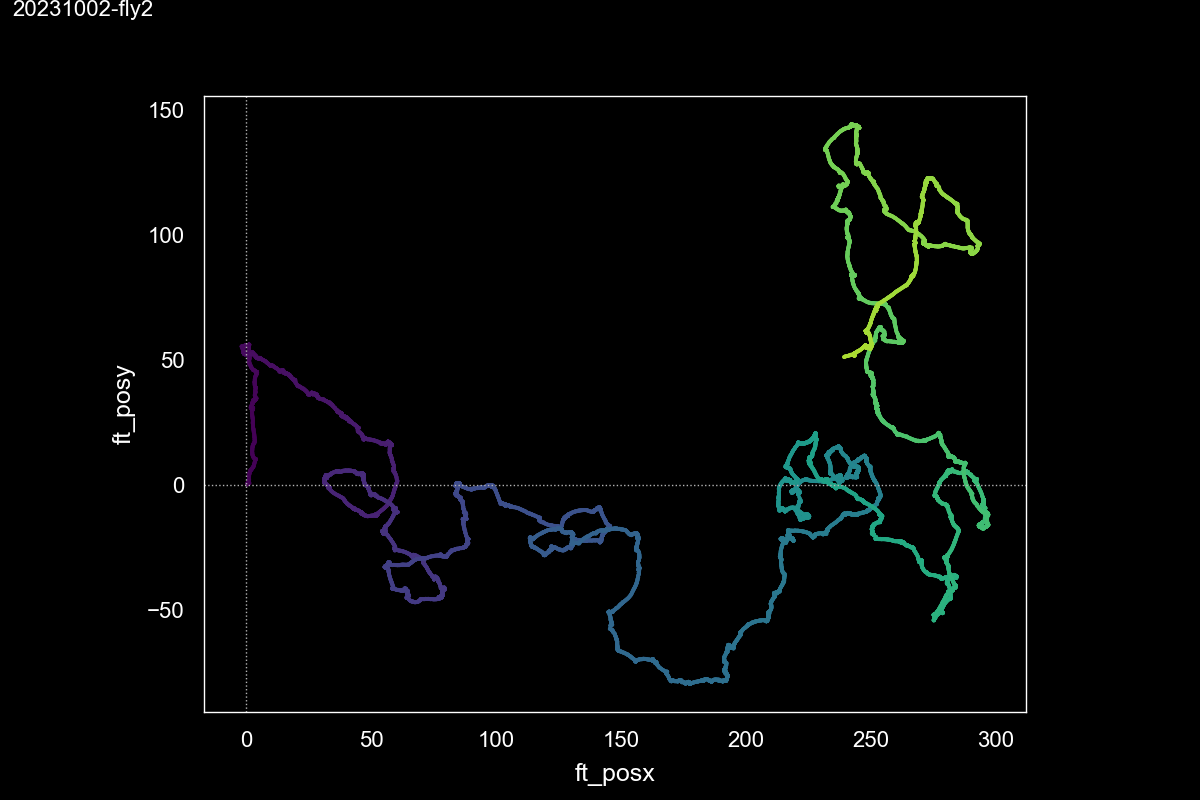

/Volumes/Julie/2p-data/20231002/processed/figures tracking_by-time_baseline_20231002-114647_P1_activation_fly2-test_000


In [56]:
fig, ax = pl.subplots()
fn = filenames[0]
df1_ = merged[merged['filename']==fn].copy()
dur_min = df1_['rel_time'].max() / 60.
sns.scatterplot(data=df1_, x=xvar, y=yvar, ax=ax, palette=hue_cmap,
               edgecolor='none', s=2 , legend=0, hue=hue_var, hue_norm=hue_norm)
ax.axvline(x=0, linestyle=':', lw=0.5, color=[0.7]*3)
ax.axhline(y=0, linestyle=':', lw=0.5, color=[0.7]*3)
ax.set_aspect('equal')

util.label_figure(fig, figid)
figname = 'tracking_by-time_baseline_{}'.format(fn)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(figdir, figname)

<IPython.core.display.Javascript object>


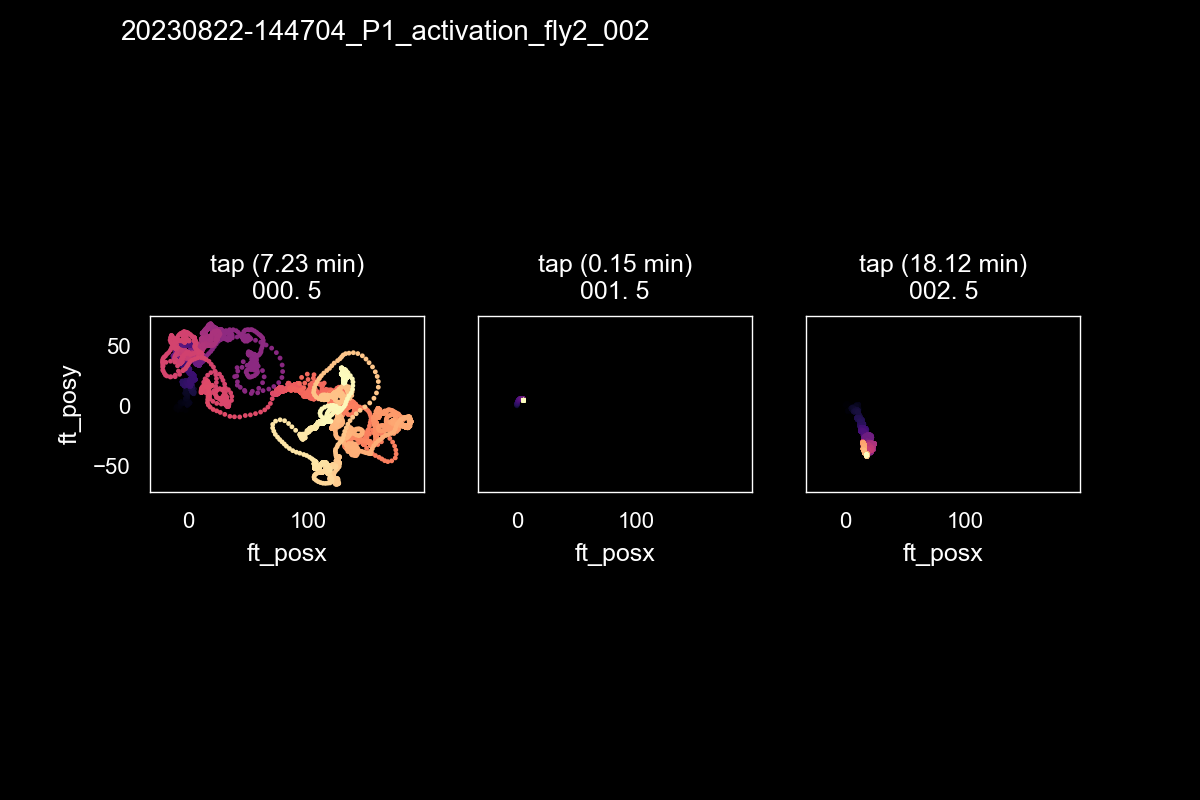

Text(0.1, 0.95, '20230822-144704_P1_activation_fly2_002')

In [75]:
n_files = len(filenames)
fig, axn = pl.subplots(1, n_files, sharex=True, sharey=True, figsize=(n_files*2, 4))
for ai, (fn, df_) in enumerate(merged.groupby('filename')):
    ax=axn[ai]
    #df1_ = merged[merged['filename']==fn].copy()
    dur_min = df_['rel_time'].max() / 60.
    sns.scatterplot(data=df_, x=xvar, y=yvar, ax=ax, palette='magma',
                   edgecolor='none', s=3 , legend=0, hue='rel_time') #color=colors[ci])
                    #hue_norm=mpl.colors.Normalize(vmin=0, vmax=1800))
    curr_cond = df_['condition'].unique()[0]
    ax.set_title('{} ({:.2f} min)\n{}. {}'.format(curr_cond, dur_min, \
                                                  fn.split('_')[-1], bk))
    ax.set_aspect('equal')
fig.text(0.1, 0.95, fn)


<IPython.core.display.Javascript object>


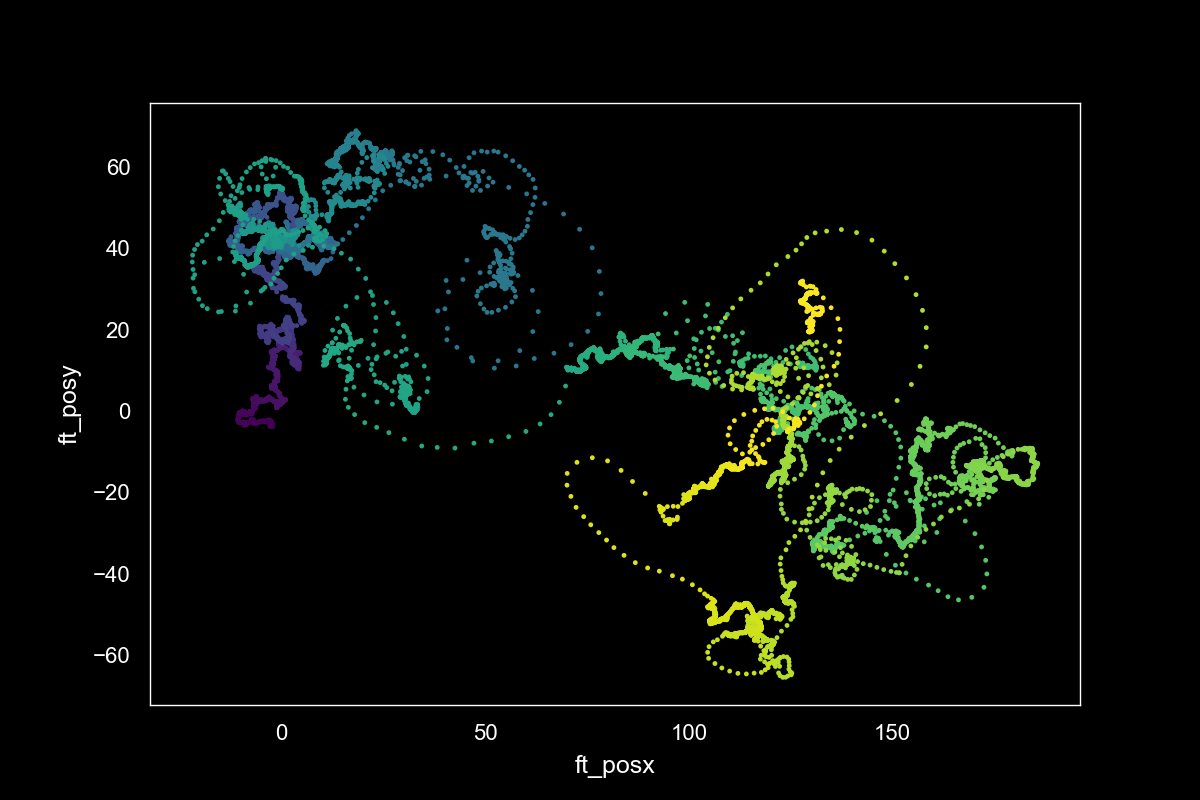

20230822-124915_P1_activation_fly2_000


In [85]:
fig, ax = pl.subplots()
fn = filenames[0]
print(fn)
df_ = merged[merged['filename']==fn]

#df1_ = merged[merged['filename']==fn].copy()
dur_min = df_['rel_time'].max() / 60.
sns.scatterplot(data=df_, x=xvar, y=yvar, ax=ax, palette='viridis',
               edgecolor='none', s=3 , legend=0, hue='rel_time') #color=colors[ci])

ax.set_aspect(1)

In [77]:
df1_['blocknum'].unique()

array([0, 1, 2, 3, 4, 5])